In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

Assignment: https://github.com/GalvanizeDataScience/gradient-boosted-regression

Lecture: https://github.com/gSchool/DSI_Lectures/tree/master/boosting/natalie_hunt

In [2]:
boston = load_boston()
# House Prices
y = boston.target 
# The other 13 features
x = boston.data

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, random_state=1)

In [4]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
rfr = RandomForestRegressor(n_estimators = 100, 
                            n_jobs = -1, 
                            random_state=1)

gdbr = GradientBoostingRegressor(learning_rate=0.1,
                                loss = 'ls',
                                n_estimators = 100,
                                random_state = 1)
abr = AdaBoostRegressor(DecisionTreeRegressor(), 
                       learning_rate= 0.1,
                       loss='linear',
                       n_estimators = 100,
                       random_state=1)


In [7]:
rfr = rfr.fit(x_train, y_train)
gdbr = gdbr.fit(x_train, y_train)
abr = abr.fit(x_train, y_train)

**4. Using `cross_val_score` in `sklearn`, define a function that 
   calculates the cross-validated train MSE and R2 for `AdaBoostRegressor`,
   `GradientBoostingRegressor`, `RandomForestRegressor`.**

In [8]:
def crossval(names, model, score_metric, splits):
    scores = []
    for i in model:
        model_name = type(i).__name__
        for j in score_metric:
            if j =='neg_mean_squared_error':
                mean_score = cross_val_score(i,x_train,y_train,cv=splits, scoring=j)
                mean_score *= -1
                mean_score = np.mean(mean_score)
                
                print('{:25s} Train cv | {:25s}: {}'.format(model_name, j, mean_score))
            if j == 'r2':
                r_score = cross_val_score(i, x_train, y_train, cv=splits, scoring=j)
                r_score = np.mean(r_score)
                print('{:25s} Train cv | {:25s}: {}'.format(model_name, j, r_score))

def crossval(model, score_metric):
    scores = []
    for i in model:
        for j in score_metric:
            if j == 'neg_mean_squared_error':
                tempscore = cross_val_score(i, x, y, cv=2, scoring=j)
                tempscore *= -1
                tempscore = tempscore[0]
            else:
                tempscore = cross_val_score(i, x, y, cv=2, scoring=j)
                tempscore = tempscore[0]
            scores.append(tempscore)
            return scores

In [9]:
models = [rfr, gdbr, abr]
scoring = ['neg_mean_squared_error','r2']
names = ['RandomForestRegressor','GradientBoostingRegressor','AdaBoostRegressor']

In [10]:
crossval(names, models, scoring, splits=3)

RandomForestRegressor     Train cv | neg_mean_squared_error   : 10.346147025096734
RandomForestRegressor     Train cv | r2                       : 0.8687257571757376
GradientBoostingRegressor Train cv | neg_mean_squared_error   : 8.922938447004922
GradientBoostingRegressor Train cv | r2                       : 0.8872368389040602
AdaBoostRegressor         Train cv | neg_mean_squared_error   : 9.847511885019346
AdaBoostRegressor         Train cv | r2                       : 0.8764316645338063


5. Define a new instance of `GradientBoostingRegressor` with the exact same
   hyperparameters as above, except change the `learning_rate` to `1`
   (instead of `0.1`). Calculate the cross-validated train MSE.
    What do you notice?

In [11]:
gdbr = GradientBoostingRegressor(learning_rate=1.0,
                                loss = 'ls',
                                n_estimators = 100,
                                random_state = 1)
gdbr = gdbr.fit(x_train, y_train)

models = [rfr, gdbr, abr]
scoring = ['neg_mean_squared_error','r2']
names = ['RandomForestRegressor','GradientBoostingRegressor','AdaBoostRegressor']
crossval(names, models, scoring, splits=3)

RandomForestRegressor     Train cv | neg_mean_squared_error   : 10.346147025096736
RandomForestRegressor     Train cv | r2                       : 0.8687257571757376
GradientBoostingRegressor Train cv | neg_mean_squared_error   : 17.83700091668591
GradientBoostingRegressor Train cv | r2                       : 0.77647402407251
AdaBoostRegressor         Train cv | neg_mean_squared_error   : 9.847511885019346
AdaBoostRegressor         Train cv | r2                       : 0.8764316645338063


6. We're going to make a plot to help us understand the impact of the learning rate
   and the improvements in error after each iteration of the boosting.

In [12]:
def mseboostfind(rate = 0.1):
    mse_train = []
    mse_test = []
    
    # Train Data
    gdbr = GradientBoostingRegressor(learning_rate=rate,
                                loss = 'ls',
                                n_estimators = 100,
                                random_state = 1)
    gdbr = gdbr.fit(x_train, y_train)
    models_train = list(gdbr.staged_predict(x_train))
    
    for i in models_train:
        mse = mean_squared_error(y_train, i)
        mse_train.append(mse)
        
        
    # Test data
    gdbr = GradientBoostingRegressor(learning_rate=rate,
                                loss = 'ls',
                                n_estimators = 100,
                                random_state = 1)
    gdbr = gdbr.fit(x_train, y_train)
    models_test = list(gdbr.staged_predict(x_test))

    for i in models_test:
        mse = mean_squared_error(y_test, i)
        mse_test.append(mse)
    return mse_train, mse_test

In [13]:
mse_train, mse_test = mseboostfind()

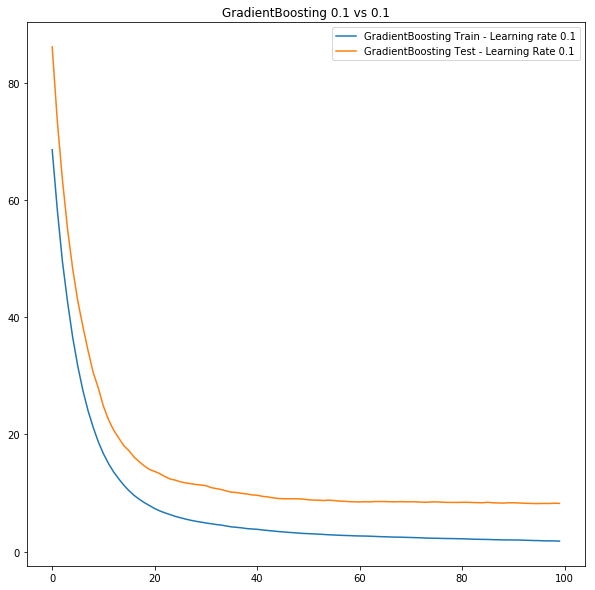

In [14]:
fig, ax = plt.subplots(1, figsize=(10,10))

ax.plot(mse_train, label = 'GradientBoosting Train - Learning rate 0.1')
ax.plot(mse_test, label = 'GradientBoosting Test - Learning Rate 0.1')
ax.set_title('GradientBoosting 0.1 vs 0.1')
plt.legend()

**7. Use your `stage_score_plot` function to make a plot that shows the error
   for gradient boosting with a learning rate of 0.1 and 1.**

   **Since you are comparing two models and we're showing both the training and
   test error, you should have 4 lines on your graph.**

In [15]:
mse_train_one, mse_test_one = mseboostfind(rate = 1.0)

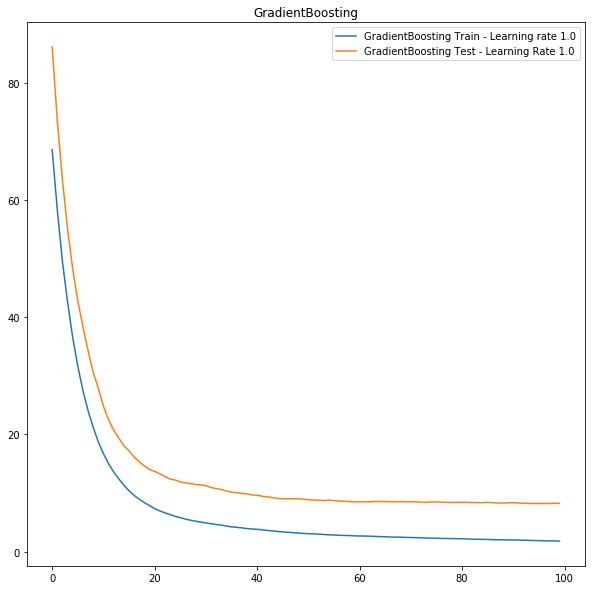

In [16]:
fig, ax = plt.subplots(1, figsize=(10,10))

ax.plot(mse_train, label = 'GradientBoosting Train - Learning rate 1.0')
ax.plot(mse_test, label = 'GradientBoosting Test - Learning Rate 1.0')
ax.set_title('GradientBoosting')
plt.legend()

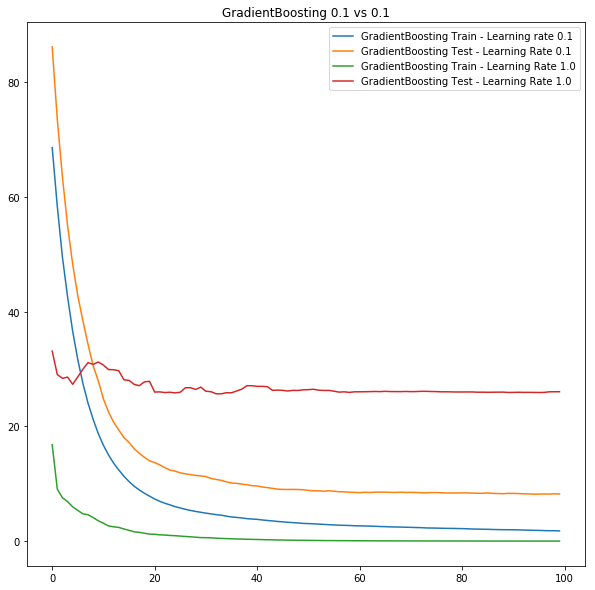

In [17]:
fig, ax = plt.subplots(1, figsize=(10,10), sharex=True, sharey=True)

ax.plot(mse_train, label = 'GradientBoosting Train - Learning rate 0.1')
ax.plot(mse_test, label = 'GradientBoosting Test - Learning Rate 0.1')
ax.plot(mse_train_one, label = 'GradientBoosting Train - Learning Rate 1.0')
ax.plot(mse_test_one, label = 'GradientBoosting Test - Learning Rate 1.0')

ax.set_title('GradientBoosting 0.1 vs 0.1')
plt.legend()

**8. Given your plot, explain the behavior of the test / train curves
   for the two (0.1 and 1) learning rates. With a lower learning rate (0.1),
   what is necessary to obtain a low test error?**

For both learning rates the train error drops to near zero with
progressive boosting stages (iterations).  However, the larger learning
rate test error doesn't decrease as more iterations are added.  The larger
learning rate makes large changes per iteration and so likely overfits
the data.  For the lower learning rate model to get low test error, many
boosting stages are required.

In [23]:
def rf_score():
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=1)
    rf.fit(x_train, y_train)
    y_test_pred = rf.predict(x_test)
    test_score = mean_squared_error(y_test, y_test_pred)
    return test_score

In [24]:
rf_scores = rf_score()

In [25]:
rf_scores

8.945236166666666

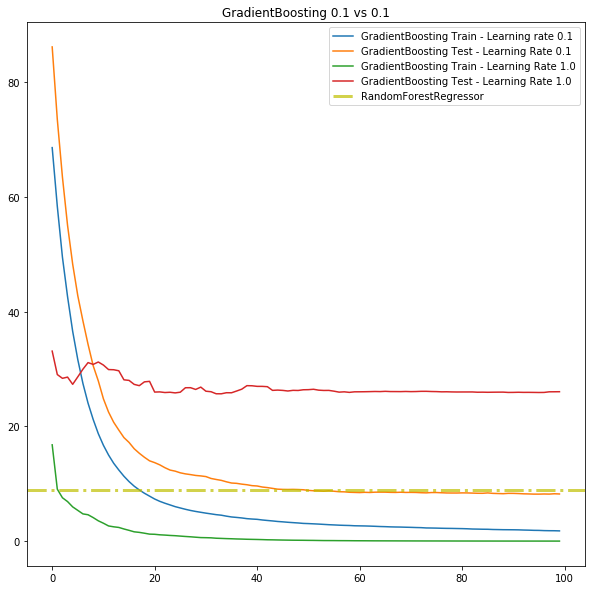

In [27]:
fig, ax = plt.subplots(1, figsize=(10,10), sharex=True, sharey=True)

ax.plot(mse_train, label = 'GradientBoosting Train - Learning rate 0.1')
ax.plot(mse_test, label = 'GradientBoosting Test - Learning Rate 0.1')
ax.plot(mse_train_one, label = 'GradientBoosting Train - Learning Rate 1.0')
ax.plot(mse_test_one, label = 'GradientBoosting Test - Learning Rate 1.0')
ax.axhline(rf_scores, label='RandomForestRegressor', c='y', lw=3, ls='-.', alpha=0.7)

ax.set_title('GradientBoosting 0.1 vs 0.1')
plt.legend()


**10) Compare Adaboost Regressor with lr = 0.1 to the Random Forest Regressor**


In [35]:
def ada_mseboostfind(rate = 0.1):
    mse_train = []
    mse_test = []
    
    # Train Data
    abr = AdaBoostRegressor(DecisionTreeRegressor(), 
                       learning_rate= 0.1,
                       loss='linear',
                       n_estimators = 100,
                       random_state=1)
    
    abr = gdbr.fit(x_train, y_train)
    models_train = list(abr.staged_predict(x_train))
    
    for i in models_train:
        mse = mean_squared_error(y_train, i)
        mse_train.append(mse)
        
        
    # Test data
    
    models_test = list(abr.staged_predict(x_test))

    for i in models_test:
        mse = mean_squared_error(y_test, i)
        mse_test.append(mse)
    return mse_train, mse_test

In [36]:
ada_train, ada_test = ada_mseboostfind()

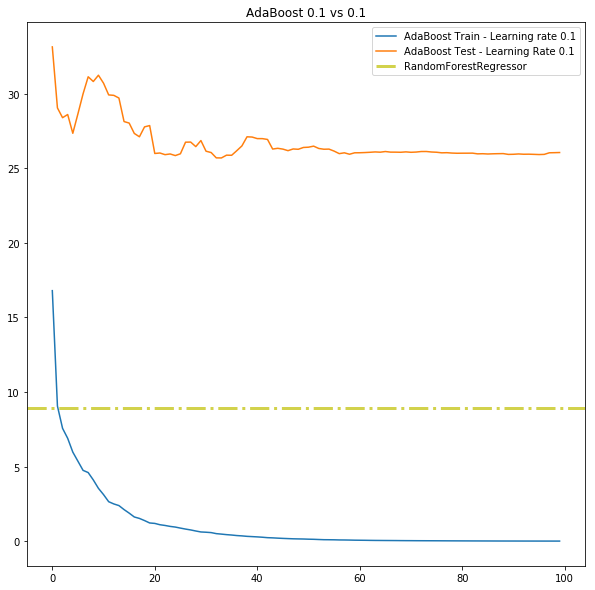

In [37]:
fig, ax = plt.subplots(1, figsize=(10,10), sharex=True, sharey=True)

ax.plot(ada_train, label = 'AdaBoost Train - Learning rate 0.1')
ax.plot(ada_test, label = 'AdaBoost Test - Learning Rate 0.1')
ax.axhline(rf_scores, label='RandomForestRegressor', c='y', lw=3, ls='-.', alpha=0.7)

ax.set_title('AdaBoost 0.1 vs 0.1')
plt.legend()



10) With the current hyperparameters, Adaboost performs erratically.
With very few iterations it outperforms Random Forest but then its
MSE rises to perform worse than the Random Forest.




**11) Use gridsearch to find the best hyperparameters for the Random Forest**


In [48]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=1)

In [49]:
def gridsearch_with_output(estimator, parameter_grid, x_train, y_train):
    '''
        Parameters: estimator: the type of model (e.g. RandomForestRegressor())
                    paramter_grid: dictionary defining the gridsearch parameters
                    X_train: 2d numpy array
                    y_train: 1d numpy array
        Returns:  best parameters and model fit with those parameters
    '''
    # utilize gridsearch from sklearn for heavy lifting you can put a dictionary
    # inside this!
    model_gridsearch = GridSearchCV(estimator, 
                                   parameter_grid,
                                   n_jobs= -1,
                                   verbose=True,
                                   scoring = 'neg_mean_squared_error')
    model_gridsearch.fit(x_train, y_train)
    best_params = model_gridsearch.best_params_
    model_best = model_gridsearch.best_estimator_
    print("\nResult of gridsearch:")
    print("{0:<20s} | {1:<8s} | {2}".format("Parameter", "Optimal", "Gridsearch values"))
    print("-" * 55)
    for param, vals in parameter_grid.items():
        print("{0:<20s} | {1:<8s} | {2}".format(str(param), 
                                                str(best_params[param]),
                                                str(vals)))
    return best_params, model_best

In [55]:
def display_default_and_gsearch_model_results(model_default, model_gridsearch, 
                                              x_test, y_test):
    '''
        Parameters: model_default: fit model using initial parameters
                    model_gridsearch: fit model using parameters from gridsearch
                    X_test: 2d numpy array
                    y_test: 1d numpy array
        Return: None, but prints out mse and r2 for the default and model with
                gridsearched parameters
    '''
    name = model_default.__class__.__name__.replace('Regressor', '') # for printing
    y_test_pred = model_gridsearch.predict(x_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print("Results for {0}".format(name))
    print("Gridsearched model mse: {0:0.3f} | r2: {1:0.3f}".format(mse, r2))
    y_test_pred = model_default.predict(x_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print("     Default model mse: {0:0.3f} | r2: {1:0.3f}".format(mse, r2))

In [59]:
print("\n11) RandomForest GridSearch" )
random_forest_grid = {'max_depth': [3, None],
                  'max_features': ['sqrt', 'log2', None],
                  'min_samples_split': [2, 4],
                  'min_samples_leaf': [1, 2, 4],
                  'bootstrap': [True, False],
                  'n_estimators': [10, 20, 40, 80],
                  'random_state': [1]}
rf_best_params, rf_best_model = gridsearch_with_output(RandomForestRegressor(), 
                                                       random_forest_grid, 
                                                       x_train, y_train)
print("\nb & c) Comparing model with gridsearch params to initial model on Test set.")
rf.fit(x_train, y_train)
display_default_and_gsearch_model_results(rf, rf_best_model, x_test, y_test)


11) RandomForest GridSearch
Fitting 3 folds for each of 288 candidates, totalling 864 fits


/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:    6.2s finished
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Result of gridsearch:
Parameter            | Optimal  | Gridsearch values
-------------------------------------------------------
max_depth            | None     | [3, None]
max_features         | None     | ['sqrt', 'log2', None]
min_samples_split    | 2        | [2, 4]
min_samples_leaf     | 1        | [1, 2, 4]
bootstrap            | True     | [True, False]
n_estimators         | 40       | [10, 20, 40, 80]
random_state         | 1        | [1]

b & c) Comparing model with gridsearch params to initial model on Test set.
Results for RandomForest
Gridsearched model mse: 8.741 | r2: 0.912
     Default model mse: 8.945 | r2: 0.909



**12) Use gridsearch to find the best hyperparameters for the Gradient Boosting**


In [61]:
gradient_boosting_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
                          'max_depth': [2, 4, 6],
                          'min_samples_leaf': [1, 2, 5, 10],
                          'max_features': [1.0, 0.3, 0.1],
                          'n_estimators': [500],
                          'random_state': [1]}
gdbr_best_params, gdbr_best_model = gridsearch_with_output(GradientBoostingRegressor(), 
                                                           gradient_boosting_grid, 
                                                           x_train, y_train)
print("\nComparing model with gridsearch params to initial model on Test set.")
gdbr.fit(x_train, y_train)
display_default_and_gsearch_model_results(gdbr, gdbr_best_model, x_test, y_test)

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 342 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   18.1s finished
/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Result of gridsearch:
Parameter            | Optimal  | Gridsearch values
-------------------------------------------------------
learning_rate        | 0.05     | [0.1, 0.05, 0.02, 0.01]
max_depth            | 4        | [2, 4, 6]
min_samples_leaf     | 1        | [1, 2, 5, 10]
max_features         | 1.0      | [1.0, 0.3, 0.1]
n_estimators         | 500      | [500]
random_state         | 1        | [1]

Comparing model with gridsearch params to initial model on Test set.
Results for GradientBoosting
Gridsearched model mse: 8.166 | r2: 0.917
     Default model mse: 26.055 | r2: 0.736




11 & 12) For both RandomForest and GradientBoosting regressors, the model
with gridsearched parameters outperformed (had a lower mse) than the 
default model.

